# 4.10 Coding Etiquette & Excel Reporting
# Task
# Marie Jacobsson

1. Import libraries

1. Import data

2. Address PII data

3. Customer behavior in different regions 

4. Exclusion flag

5. Profiling variable
  <ul>
<li>5.1 Age</li>
 <li>5.2 Income</li>
 <li>5.3 Dependants</li>
 <li>5.4 Departments</li>
 <li>5.5 Week of day</li>
 <li>5.6 Crosstabs</li>
 <li>5.7 Middle-aged customer</li>
  </ul>

6. Visualizations
  <ul>
<li>6.1 Bar Age group</li>
 <li>6.2 Bar Income status</li>
 <li>6.3 Bar Dependants status</li>
 <li>6.4 Pie Dependants status</li>
 <li>6.5 Bar Orders hour of day</li>
 <li>6.6 Bar Orders day of week</li>
 <li>6.7 Bar Income / Order day of week</li>
 <li>6.8 Bar Age / Dependants</li>
  </ul>

7. Aggregate the max, mean and min
  <ul>
<li>7.1 Price in Age group</li>
 <li>7.2 Orders hour of day by income</li>
 <li>7.3 Number of dependants by age group</li>
  </ul>

8. Compare customer profile

9. Visualizations
  <ul>
<li>9.1 Bar Loyalty / Order day of week</li>
 <li>9.2 Bar Loyalty / Department</li>
 <li>9.3 Bar Income / Region</li>
 <li>9.4 Bar Number of dependants / Region</li>
 <li>9.5 Bar Age / Order day of week</li>
 <li>9.6 Bar Family status / Orders day of week</li>
 <li>9.7 Pie Family status</li>
 <li>9.8 Bar Family status / Orders hour of day</li>
    <li>9.9 Bar Price range</li>
    <li>9.10 Bar Region / Orders day of week</li>
  </ul>

10. Export visualizations

11. Export data

# 1. Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1. Import data

In [2]:
# Create a path

path = r'/Users/marie/Documents/CareerFoundry/09-2021 Instacart Basket Analysis'

In [3]:
# Import data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_current.pkl'))

In [4]:
df.shape

(32435059, 32)

# 2. Address PII data

In [5]:
# Print head of dataframe

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,loyalty_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


**Answer: PII Data is first name and last name.**

In [6]:
# Drop columns with PII data

df_2 = df.drop(['first_name', 'last_name'], axis = 1)

In [7]:
# Print head of new dataframe

df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,busiest_period_of_day,max_order,loyalty_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3. Customer behavior in different regions

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [8]:
# Create lists for each region

region1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region3 = ['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
#Create a for loop

result = []

for value in df_2['state']:
  if value in region1:
    result.append("Northeast")
  elif value in region2:
    result.append("Midwest")
  elif value in region3:
    result.append("South")
  elif value in region4:
    result.append("West")
  else:
    result.append("Unknown")

In [10]:
# Check the output

result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Wes

In [11]:
# Add a new column "Region" to the dataframe and add the "result"

df_2['region'] = result

In [12]:
# Check the frequecy

df_2['region'].value_counts(dropna = False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: region, dtype: int64

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [13]:
# Create a new column "spending" to dataframe
# Split the data into groups based on the "user_id" and "prices" column
# Apply the transform() function to generate the mean price for each user.

df_2['spending'] = df_2.groupby(['user_id'])['prices'].transform(np.mean)

In [14]:
# Create spending flag depending on prices

df_2.loc[df_2['prices'] < 10, 'spending_flag'] = 'Low spender'
df_2.loc[df_2['prices'] >= 10, 'spending_flag'] = 'High spender'

In [15]:
# Check the frequency on new column "Spending Flag"

df_2['spending_flag'].value_counts(dropna=False)

Low spender     21760937
High spender    10643922
NaN                30200
Name: spending_flag, dtype: int64

In [16]:
# Create a crosstab to determine any d§ifference in spending between the regions

crosstab = pd.crosstab(df_2['spending_flag'], df_2['region'], dropna = False)

In [17]:
# Copy the table for pasting in Excel.

crosstab.to_clipboard()

**Answer: 33% of the total population in each region is high spenders and 67% are low spenders. Exactly the same amount for each region**

# 4. Exclusion flag

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
# Check which column to use for the exclusion flag.

pd.set_option('display.max_columns', None)
df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,Unnamed: 0.1_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,Busiest days,busiest_period_of_day,max_order,loyalty_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region,spending,spending_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,192.0,195.0,Soda,77.0,7.0,9.0,Mid range product,Regularly busy,Regular days,Regularly busy,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,Low spender
1,2539329,1,1,2,8,NaN,14084,2,0,both,14069.0,14084.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid range product,Regularly busy,Regular days,Regularly busy,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,High spender
2,2539329,1,1,2,8,NaN,12427,3,0,both,12412.0,12427.0,Original Beef Jerky,23.0,19.0,4.4,Low range product,Regularly busy,Regular days,Regularly busy,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,Low spender
3,2539329,1,1,2,8,NaN,26088,4,0,both,26073.0,26089.0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low range product,Regularly busy,Regular days,Regularly busy,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,Low spender
4,2539329,1,1,2,8,NaN,26405,5,0,both,26390.0,26406.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low range product,Regularly busy,Regular days,Regularly busy,Average orders,10,New customer,Female,Alabama,31,2/17/2019,3,married,40423,South,6.367797,Low spender


In [19]:
# Create exclusion flag with loc function

df_2.loc[df_2['max_order'] < 5, 'exclusion_flag'] = 'low-activity customer'

In [20]:
df_2.loc[df_2['max_order'] >= 5, 'exclusion_flag'] = 'ordinary customer'

In [21]:
# Check the frequency on exclusion_flag

df_2['exclusion_flag'].value_counts(dropna=False)

ordinary customer        30993489
low-activity customer     1441570
Name: exclusion_flag, dtype: int64

In [22]:
# Control if the numbers seams to be correct comparing to the whole dataframe

df_2.shape

(32435059, 34)

In [23]:
# Create a subset with low-activity customers to exclude

low_activity_customers = df_2[df_2['exclusion_flag'] == 'low-activity customer']

In [24]:
# Check if the subset contains 1441570 rows

low_activity_customers.shape

(1441570, 34)

In [25]:
# Export sample data

low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [26]:
# Exclude low-activity customers from dataframe

df_3 = df_2[df_2['exclusion_flag'] == 'ordinary customer']

In [27]:
# Check the output

df_3['exclusion_flag'].value_counts() 

ordinary customer    30993489
Name: exclusion_flag, dtype: int64

# 5. Profiling variable

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

**5.1 Age**

In [28]:
# Check the frequency on age column

df_3['age'].value_counts().sort_index()

18    478848
19    496657
20    480636
21    489613
22    491315
       ...  
77    478495
78    471475
79    508850
80    493150
81    486346
Name: age, Length: 64, dtype: int64

In [29]:
# Create age_group flag with loc

df_3.loc[(df_3['age'] >=18) & (df_3['age'] <=29), 'age_group'] = 'young customer'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [30]:
df_3.loc[(df_3['age'] >=30) & (df_3['age'] <=59), 'age_group'] = 'middle aged customer'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
df_3.loc[df_3['age'] >60, 'age_group'] = 'older customer'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
# Check the output

df_3['age_group'].value_counts() 

middle aged customer    14586124
older customer          10121834
young customer           5823190
Name: age_group, dtype: int64

**5.2 Income**

In [33]:
# Check max value in column income

column = df_3['income']
max_value = column.max()

In [34]:
# Check the output

print(max_value)

593901


In [35]:
# Create income_status flag with loc

df_3.loc[(df_3['income'] >=0) & (df_3['income'] <=49900), 'income_status'] = 'low income'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [36]:
df_3.loc[(df_3['income'] >=50000) & (df_3['income'] <=99900), 'income_status'] = 'regular income'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [37]:
df_3.loc[df_3['income'] >100000, 'income_status'] = 'high income'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
# Check frequency in the income_staus flag

df_3['income_status'].value_counts()

high income       14219446
regular income    13362566
low income         3354844
Name: income_status, dtype: int64

**5.3 Dependants status**

In [39]:
# Get the frequency of n_dependants in the dataframe

df_3['n_dependants'].value_counts()

3    7779638
0    7747183
2    7740539
1    7726129
Name: n_dependants, dtype: int64

In [40]:
# Create dependants flag with loc

df_3.loc[df_3['n_dependants'] == 0, 'dependants_status'] = 'No dependants'
df_3.loc[df_3['n_dependants'] >= 1, 'dependants_status'] = '>1 dependants'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [41]:
# Get the frequency of dependants status in the dataframe

df_3['dependants_status'].value_counts()

>1 dependants    23246306
No dependants     7747183
Name: dependants_status, dtype: int64

**5.4 Departments**

In [42]:
# Import department file from Original data 

dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [43]:
dep.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [44]:
#Change columns to rows in dataframe departments permanently 

df_dep = dep.T

In [45]:
# Check the output

df_dep

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [46]:
#Adding index

df_dep.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [47]:
#Create a header, (the first row of df_dep)

new_header = df_dep.iloc[0]

In [48]:
#Copying df_dep without first row (0) to a new dataframe df_dep_new

df_dep_new = df_dep[1:]

In [49]:
# Set the header row as the df_dep_new header

df_dep_new.columns = new_header

In [50]:
# Check the output

df_dep_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [51]:
# Create departments name with loc


df_3.loc[df_3['department_id'] == 1, 'department'] = 'Frozen'
df_3.loc[df_3['department_id'] == 2, 'department'] = 'Other'
df_3.loc[df_3['department_id'] == 3, 'department'] = 'Bakery'
df_3.loc[df_3['department_id'] == 4, 'department'] = 'Produce'
df_3.loc[df_3['department_id'] == 5, 'department'] = 'Alcohol'
df_3.loc[df_3['department_id'] == 6, 'department'] = 'International'
df_3.loc[df_3['department_id'] == 7, 'department'] = 'Beverages'
df_3.loc[df_3['department_id'] == 8, 'department'] = 'Pets'
df_3.loc[df_3['department_id'] == 9, 'department'] = 'Dry goods pasta'
df_3.loc[df_3['department_id'] == 10, 'department'] = 'Bulk'
df_3.loc[df_3['department_id'] == 11, 'department'] = 'Personal care'
df_3.loc[df_3['department_id'] == 12, 'department'] = 'Meat seafood'
df_3.loc[df_3['department_id'] == 13, 'department'] = 'Pantry'
df_3.loc[df_3['department_id'] == 14, 'department'] = 'Breakfast'
df_3.loc[df_3['department_id'] == 15, 'department'] = 'Canned goods'
df_3.loc[df_3['department_id'] == 16, 'department'] = 'Dairy eggs'
df_3.loc[df_3['department_id'] == 17, 'department'] = 'Households'
df_3.loc[df_3['department_id'] == 18, 'department'] = 'Babies'
df_3.loc[df_3['department_id'] == 19, 'department'] = 'Snacks'
df_3.loc[df_3['department_id'] == 20, 'department'] = 'Deli'
df_3.loc[df_3['department_id'] == 21, 'department'] = 'Missing'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [52]:
# Check the output

df_3['department'].value_counts()

Produce            9079276
Dairy eggs         5177183
Snacks             2766406
Beverages          2571901
Frozen             2121732
Pantry             1782705
Bakery             1120828
Canned goods       1012074
Deli               1003834
Dry goods pasta     822136
Households          699858
Meat seafood        674781
Breakfast           670850
Personal care       424306
Babies              410392
International       255991
Alcohol             144627
Pets                 93060
Missing              64768
Other                34411
Bulk                 33451
Name: department, dtype: int64

**5.5 Week of day**

In [53]:
# Creating week of day with loc  

df_3.loc[df_3['orders_day_of_week'] == 0, 'day of week'] = 'Saturday'
df_3.loc[df_3['orders_day_of_week'] == 1, 'day of week'] = 'Sunday'
df_3.loc[df_3['orders_day_of_week'] == 2, 'day of week'] = 'Monday'
df_3.loc[df_3['orders_day_of_week'] == 3, 'day of week'] = 'Tuesday'
df_3.loc[df_3['orders_day_of_week'] == 4, 'day of week'] = 'Wednesday'
df_3.loc[df_3['orders_day_of_week'] == 5, 'day of week'] = 'Thursday'
df_3.loc[df_3['orders_day_of_week'] == 6, 'day of week'] = 'Friday'

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/marie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [54]:
# Check the output

df_3['day of week'].value_counts()

Saturday     5913988
Sunday       5417154
Friday       4295043
Thursday     4037411
Monday       4028561
Tuesday      3673006
Wednesday    3628326
Name: day of week, dtype: int64

**5.6 Crosstabs**

In [55]:
# Create crosstabs for further analyze in Excel, correlation age - department

crosstab_age_department = pd.crosstab(df_3['age_group'], df_3['department'], dropna = False)

In [56]:
# Copy the table for pasting in Excel

crosstab_age_department.to_clipboard()

In [57]:
# Create crosstabs for further analyze in Excel, correlation age - order hour of day

crosstab_age_order_hod = pd.crosstab(df_3['age_group'], df_3['order_hour_of_day'], dropna = False)

In [58]:
# Copy the table for pasting in Excel

crosstab_age_order_hod.to_clipboard()

In [59]:
# Create crosstabs for further analyze in Excel, correlation age - order day of week

crosstab_age_order_dow = pd.crosstab(df_3['age_group'], df_3['day of week'], dropna = False)

In [60]:
# Copy the table for pasting in Excel

crosstab_age_order_dow.to_clipboard()

In [61]:
# Create crosstabs for further analyze in Excel, correlation age - dependants status

crosstab_age_dependants = pd.crosstab(df_3['age_group'], df_3['dependants_status'], dropna = False)

In [62]:
# Copy the table for pasting in Excel

crosstab_age_dependants.to_clipboard()

In [63]:
# Create crosstabs for further analyze in Excel, correlation age - income status

crosstab_age_income = pd.crosstab(df_3['age_group'], df_3['income_status'], dropna = False)

In [64]:
# Copy the table for pasting in Excel

crosstab_age_income.to_clipboard()

**5.7 Profiling the middle-aged customer:** <br>The most ordered items is in the category "Produce".<br> 29% of total purchased items for a middle-aged customer is in category "Produce".<br> Saturday is the most common day for ordering at Instacart. <br> The most common time at day to order is 10 am.<br>75% of the middel-aged customers has >1 dependants. <br> 45,5 % of the middle-aged customers has a high-income, <br> 43,5 % of the middle-aged customers has a regular income and <br> 11 % of the middle-aged customers has a low income.

# 6. Visualizations

**6.1 Bar Age group**

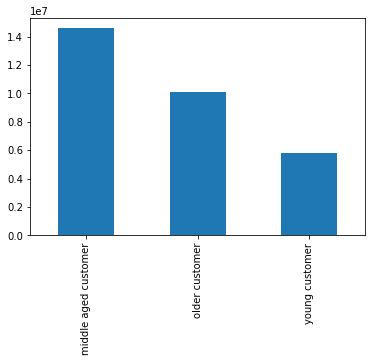

In [65]:
bar_age_group = df_3['age_group'].value_counts().sort_index().plot.bar()

**6.2 Bar Income status**

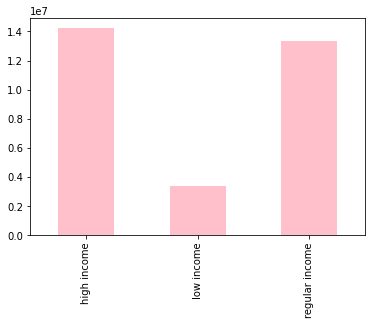

In [66]:
bar_income_status = df_3['income_status'].value_counts().sort_index().plot.bar(color = 'pink')

**6.3 Bar Dependants status**

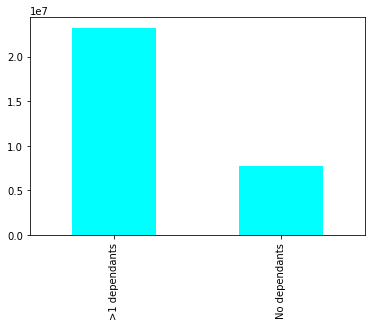

In [67]:
bar_dependants_status = df_3['dependants_status'].value_counts().sort_index().plot.bar(color = 'cyan')

**6.4 Pie Dependants status**

Text(0, 0.5, '')

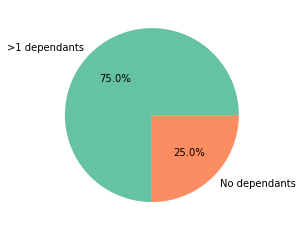

In [68]:
# Create pie chart of dependants status 

pie_dependants_status = df_3['dependants_status'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Set2',2))
plt.ylabel('')

**These four visualizations shows that the most common customer is middle-aged, with high income (or regular close by) and is a parent. 
Looks logical.**

In [69]:
# Export visualizations as image files

bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

In [70]:
bar_income_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_status.png'))

In [71]:
bar_dependants_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependants_status.png'))

In [72]:
pie_dependants_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_dependants_status.png'))

**6.5 Bar Order hour of day**

Text(0.5, 0, 'Hour')

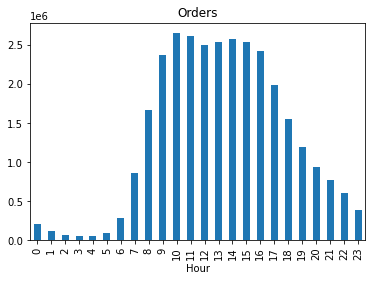

In [73]:
# Create a bar chart over order hour of day 

bar_order_hod = df_3['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Orders')
plt.xlabel('Hour')

Most orders are placed between 9-16.

**6.6 Bar Orders day of week**

Text(0.5, 0, 'Day')

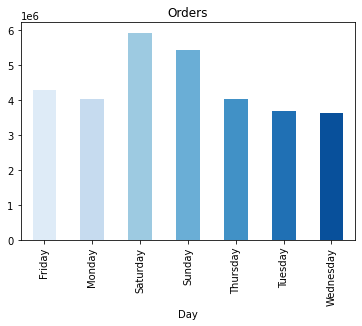

In [74]:
# Create a bar chart over order day of week 

bar_order_dow = df_3['day of week'].value_counts().sort_index().plot.bar(color = sns.color_palette('Blues', 7))
plt.title('Orders')
plt.xlabel('Day')

The most orders are placed on Saturdays, followed by Sundays.

**6.7 Bar Income/Orders day of week**

In [75]:
# Crosstab for income and order day of week

ct_income_order_dow = pd.crosstab(df_3['income_status'], df_3['day of week'], dropna = False)

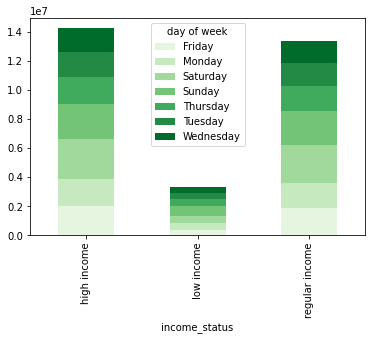

In [76]:
# Create a bar chart from crosstab income/order day of week

bar_income_orderdow = ct_income_order_dow.plot.bar(stacked = True, color = sns.color_palette('Greens', 7))

**6.8 Bar Age/Dependants**

In [77]:
# Crosstab for age group and number of dependants

ct_age_dependants = pd.crosstab(df_3['age_group'], df_3['n_dependants'], dropna = False)

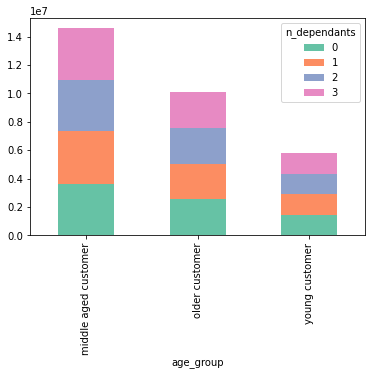

In [78]:
# Create a bar chart from crosstab age/number of depandants

bar_age_dependants = ct_age_dependants.plot.bar(stacked = True, color = sns.color_palette('Set2', 4))

In [79]:
# Export visualizations as image files

bar_order_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_hod.png'))

In [80]:
bar_order_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_dow.png'))

In [81]:
bar_income_orderdow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_orderdow.png'))

In [82]:
bar_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dependants.png'))

# 7. Aggregate the max, mean and min

**7.1 Price in Age group**

In [83]:
# Aggregate the max, mean and min for prices in the age group

agg_age_price = df_3.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

In [84]:
# Check the output

agg_age_price

prices              
                           mean  min      max
age_group                                    
middle aged customer  11.979373  1.0  99999.0
older customer        11.806147  1.0  99999.0
young customer        12.198693  1.0  99999.0

**7.2 Orders hour of day by income**

In [85]:
# Aggregate the max, mean and min for orders hour of day by income status

agg_ordershod_income = df_3.groupby('income_status').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [86]:
# Check the output

agg_ordershod_income

order_hour_of_day        
                            mean min max
income_status                           
high income            13.448590   0  23
low income             13.213228   0  23
regular income         13.420910   0  23

**7.3 Number of dependants by age group**

In [87]:
# Aggregate the max, mean and min for number of dependants by age group

agg_age_dependants = df_3.groupby('age_group').agg({'n_dependants': ['mean', 'min', 'max']})

In [88]:
# Check the output

agg_age_dependants

n_dependants        
                             mean min max
age_group                                
middle aged customer     1.497890   0   3
older customer           1.503830   0   3
young customer           1.502044   0   3

# 8. Compare customer profile

The marketing and sales teams are particularly interested in the different types of 							
customers in their system and how their ordering behaviors differ. For example: 							
 							
**‣  Are there differences in ordering habits based on a customer’s loyalty status?**							

In [89]:
# Crosstab loyalty flag/orders day of week

ct_loyalty_ordersdow = pd.crosstab(df_3['orders_day_of_week'], df_3['loyalty_flag'], dropna = False)

### Visualization 9.1

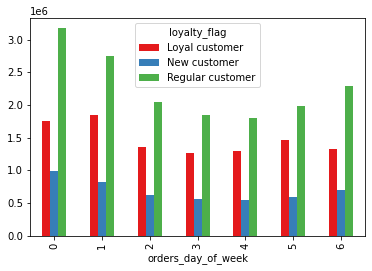

In [90]:
# Bar chart loyalty flag / orders day of week

bar_loyalty_ordersdow = ct_loyalty_ordersdow.plot.bar(color = sns.color_palette('Set1', 3))

There is no different in the pattern except ONE thing; Loyal customer place the most orders on Sundays, while the rest of the customer stock place the most orders on Saturdays.

In [91]:
# Crosstab loyalty flag/orders hour of day

ct_loyalty_orders_hod = pd.crosstab(df_3['order_hour_of_day'], df_3['loyalty_flag'], dropna = False)

### Visualization 9.2

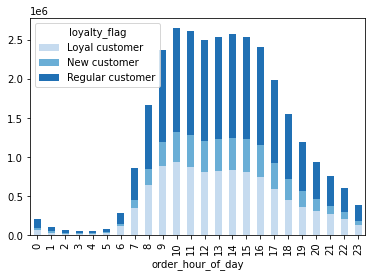

In [92]:
# Bar chart loyalty flag/orders hour of day

bar_loyalty_orders_hod = ct_loyalty_orders_hod.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues',3))

In [93]:
# Copy the table for pasting in Excel for further information

ct_loyalty_orders_hod.to_clipboard()

Loyal customer place their most orders at 10 am, new customer at 15 and regular customer at 11 a´clock.

**‣  Are there differences in ordering habits based on a customer’s region?**

In [94]:
# Compare income and region.

ct_income_region = pd.crosstab(df_3['income_status'], df_3['region'], dropna = False)

### Visualization 9.3

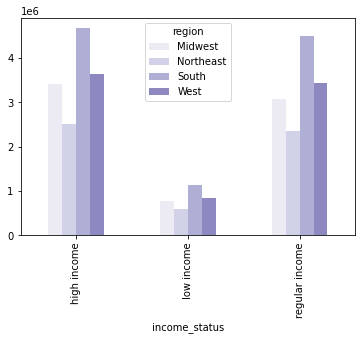

In [95]:
# Create a bar chart from crosstab income/region

bar_income_region = ct_income_region.plot.bar(color = sns.color_palette('Purples'))

Customers from South represent most of the high- low- and regular income customers. 40% of the entire population is from the region South.

In [97]:
# Compare region and number of dependants

ct_dependants_region = pd.crosstab(df_3['n_dependants'], df_3['region'], dropna = False)

### Visualization 9.4

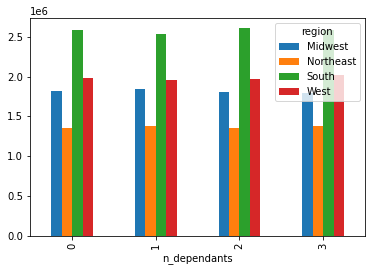

In [98]:
# Create a bar chart from crosstab region/dependants

bar_dependants_region = ct_dependants_region.plot.bar()

There is no difference between the regions regarding number of dependants.

**‣  Is there a connection between age and family status in terms of ordering habits?**

In [99]:
# Compare age_group and orders_day_of_week

ct_age_orders_dow = pd.crosstab(df_3['age_group'], df_3['orders_day_of_week'], dropna = False)

### Visualization 9.5

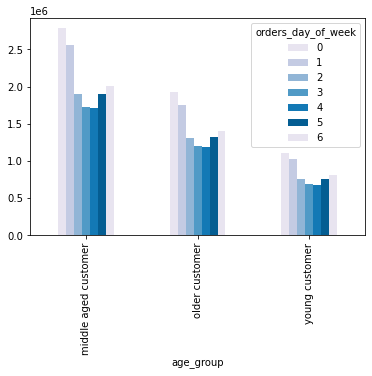

In [100]:
# Create a bar chart from crosstab age/order day of week

bar_age_orders_dow = ct_age_orders_dow.plot.bar(color = sns.color_palette('PuBu'))

All age groups have the same ordering pattern. Saturdays is the most busiest days, followed by Sundays.
**0 Sunday, 1 Saturday, 2 Monday, 3 Tuesday, 4 Wednesday, 5 Thursday, 6 Friday**

**‣  Is there a connection between age and family status in terms of ordering habits?**

In [101]:
# Compare family_status and orders_day_of_week

ct_family_orders_dow = pd.crosstab(df_3['fam_status'], df_3['orders_day_of_week'], dropna = False)

### Visualization 9.6

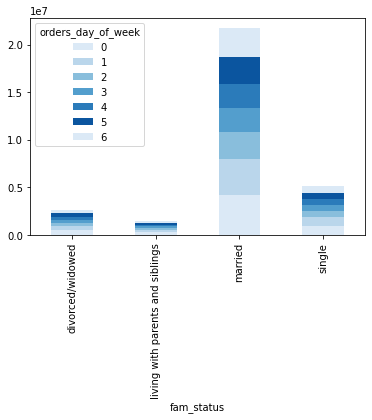

In [102]:
# Create a bar chart from crosstab family status/order day of week

bar_family_orders_dow = ct_family_orders_dow.plot.bar(stacked = True, color = sns.color_palette('Blues'))

There are no significant difference between order day of week and family status.

In [103]:
# Compare family_status and order_hour_of_day

ct_family_orders_hod = pd.crosstab(df_3['fam_status'], df_3['order_hour_of_day'], dropna = False)

### Visualization 9.7

Text(0, 0.5, '')

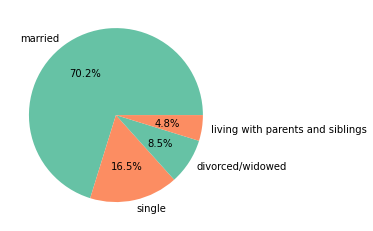

In [114]:
# Show a pie chart over family status

pie_family = df_3['fam_status'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Set2',2))
plt.ylabel('')

### Visualization 9.8

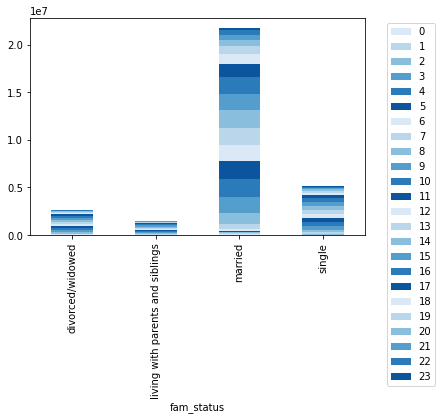

In [105]:
# Stacked bar chart over family status and orders hour of day

bar_family_orders_hod = ct_family_orders_hod.plot.bar(stacked = True, color = sns.color_palette('Blues'))
plt.legend(bbox_to_anchor=(1.05, 1))

Again the pattern looks similair between the different family status groups.

In [122]:
# Define price_label function to dataframe

def price_label(row):
    
    if row['prices'] <=5:
        return 'Low range product'
    elif (row['prices'] >5) and (row['prices'] <=15):
        return 'Mid range product'
    elif row ['prices'] >15:
        return 'High range product'
    else: return np.nan

In [125]:
# Apply the "price_label" to dataframe

df_3['price_range'] = df_3.apply(price_label, axis=1)

<ipython-input-125-c80d565a771b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['price_range'] = df_3.apply(price_label, axis=1)


In [127]:
# Check values in the new column "price_range"

df_3['price_range'].value_counts(dropna = False)

Mid range product     20891775
Low range product      9674842
High range product      397953
NaN                      28919
Name: price_range, dtype: int64

### Visualization 9.9

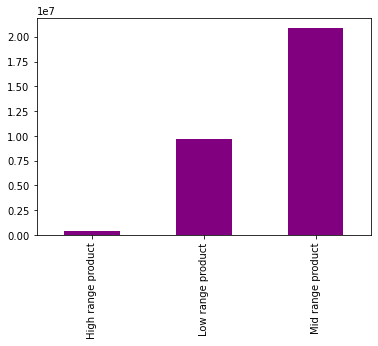

In [137]:
# Create a bar chart over price range products.

bar_price_range = df_3['price_range'].value_counts().sort_index().plot.bar(color = 'purple')

In [139]:
# Compare region and orders_day_of_week.

ct_region_orders_dow = pd.crosstab(df_3['region'], df_3['orders_day_of_week'], dropna = False)

### Visualization 9.10

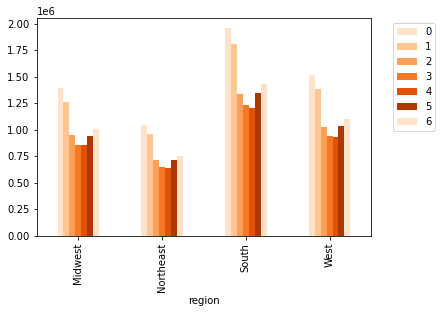

In [148]:
# Create a bar chart from crosstab region / orders day of week

bar_region_orders_dow = ct_region_orders_dow.plot.bar(color = sns.color_palette('Oranges'))
plt.legend(bbox_to_anchor=(1.05, 1))

# 9. Visualizations (above, under each customer profiling question)

# 10. Export visualizations

In [106]:
# Export visualizations as image files

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))

In [118]:
# Export visualizations as image files

bar_loyalty_orders_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_orders_hod.png'))

In [119]:
# Export visualizations as image files

bar_loyalty_ordersdow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_ordersdow.png'))

In [120]:
# Export visualizations as image files

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))

In [110]:
# Export visualizations as image files

bar_dependants_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependants_region.png'))

In [111]:
# Export visualizations as image files

bar_age_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_orders_dow.png'))

In [112]:
# Export visualizations as image files

bar_family_orders_dow .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_orders_dow.png'))

In [115]:
# Export visualizations as image files

pie_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_family.png'))

In [116]:
# Export visualizations as image files

bar_family_orders_hod .figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_orders_hod.png'))

In [138]:
# Export visualizations as image files

bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

In [150]:
# Export visualizations as image files

bar_region_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_orders_dow.png'))

# 11. Export data

In [117]:
# Export dataframe in pickle format to Prepared data

df_3.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_latest.pkl'))